Found 1600 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 200 images belonging to 2 classes.

Jumlah Data pada Kelas - Train:
Total data: 1600 gambar
edible: 800 gambar
poisonous: 800 gambar

Jumlah Data pada Kelas - Validation:
Total data: 200 gambar
edible: 100 gambar
poisonous: 100 gambar

Jumlah Data pada Kelas - Test:
Total data: 200 gambar
edible: 100 gambar
poisonous: 100 gambar

Melatih model dengan optimizer SGD...
Epoch 1/50


/home/faris-al-fatih/myenv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


50/50 ━━━━━━━━━━━━━━━━━━━━ 36s 685ms/step - accuracy: 0.5376 - loss: 0.6817 - val_accuracy: 0.6250 - val_loss: 0.6369
Epoch 2/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 36s 691ms/step - accuracy: 0.6305 - loss: 0.6252 - val_accuracy: 0.6650 - val_loss: 0.6082
Epoch 3/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 38s 737ms/step - accuracy: 0.6540 - loss: 0.6251 - val_accuracy: 0.7200 - val_loss: 0.5229
Epoch 4/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 36s 704ms/step - accuracy: 0.6664 - loss: 0.6059 - val_accuracy: 0.7150 - val_loss: 0.5630
Epoch 5/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 36s 694ms/step - accuracy: 0.6413 - loss: 0.6219 - val_accuracy: 0.6100 - val_loss: 0.6416
Epoch 6/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 36s 691ms/step - accuracy: 0.5712 - loss: 0.6645 - val_accuracy: 0.7650 - val_loss: 0.5447
Epoch 7/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 36s 702ms/step - accuracy: 0.7141 - loss: 0.5819 - val_accuracy: 0.7700 - val_loss: 0.4843
Epoch 8/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 37s 729ms/step - accuracy: 0.7236 - loss: 0.5460 - val_accuracy: 0.830

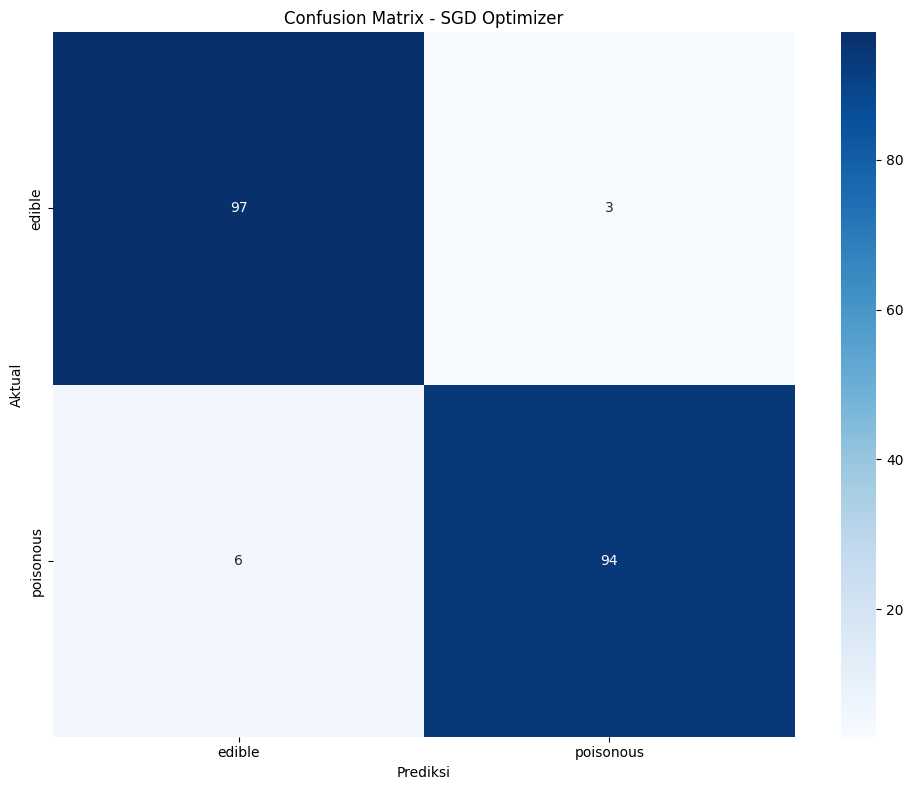

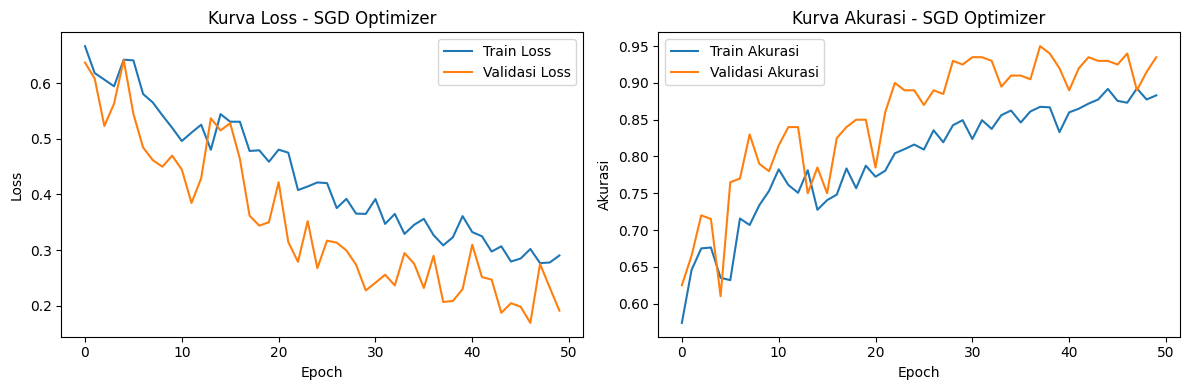


Melatih model dengan optimizer Adam...


/home/faris-al-fatih/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 41s 772ms/step - accuracy: 0.5608 - loss: 0.6800 - val_accuracy: 0.6250 - val_loss: 0.6465
Epoch 2/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 41s 798ms/step - accuracy: 0.6641 - loss: 0.6444 - val_accuracy: 0.6550 - val_loss: 0.5976
Epoch 3/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 39s 764ms/step - accuracy: 0.6742 - loss: 0.6101 - val_accuracy: 0.6300 - val_loss: 0.6279
Epoch 4/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 39s 763ms/step - accuracy: 0.6519 - loss: 0.6193 - val_accuracy: 0.7100 - val_loss: 0.5428
Epoch 5/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 41s 761ms/step - accuracy: 0.7002 - loss: 0.5583 - val_accuracy: 0.7850 - val_loss: 0.4895
Epoch 6/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 42s 779ms/step - accuracy: 0.7286 - loss: 0.5413 - val_accuracy: 0.8200 - val_loss: 0.4661
Epoch 7/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 40s 757ms/step - accuracy: 0.7554 - loss: 0.5250 - val_accuracy: 0.8300 - val_loss: 0.4419
Epoch 8/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 39s 769ms/step - accuracy: 0.7530 - loss: 0.5145 - val_accu

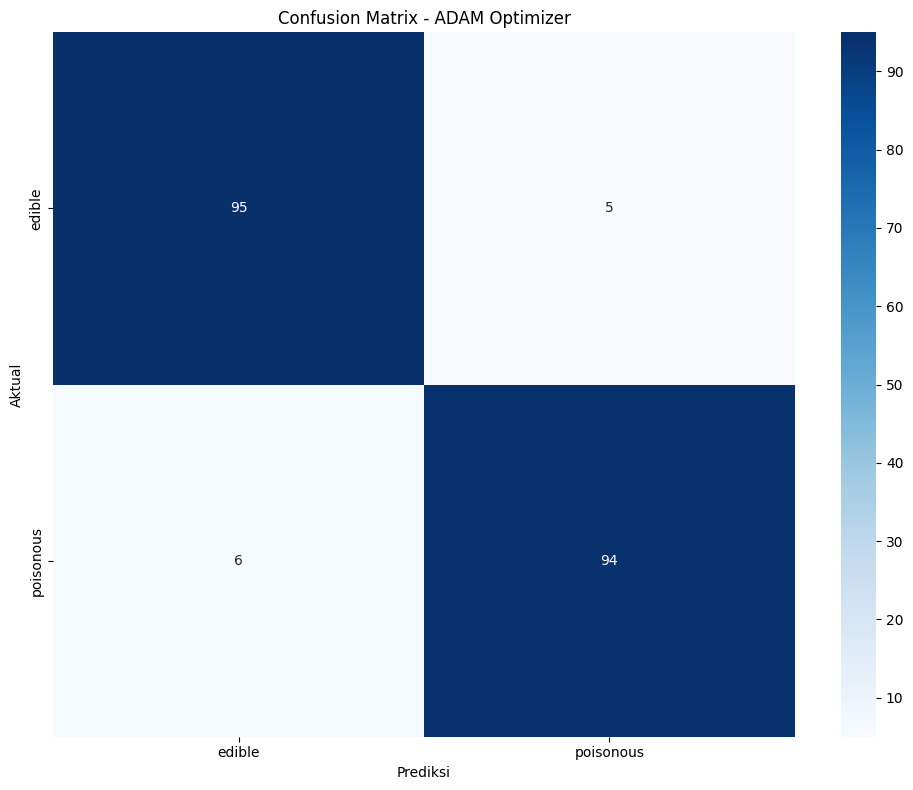

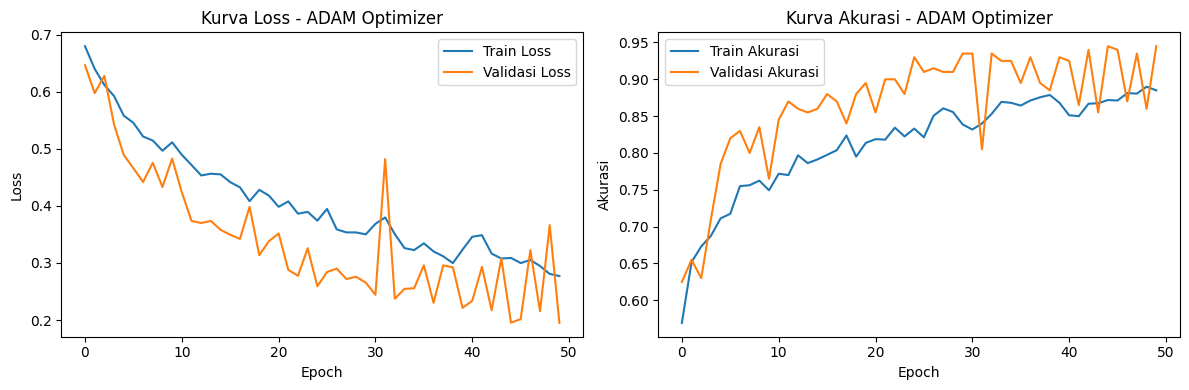


Perbandingan Hasil:
SGD - Akurasi: 0.9550, F1-Score: 0.9550
Adam - Akurasi: 0.9450, F1-Score: 0.9450

Model SGD dipilih sebagai model terbaik.


In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Direktori dataset
dataset_dir = './mushroom_dataset/'

# Fungsi untuk membuat data generator
def create_data_generators():
    # Tanpa data augmentation untuk data validasi dan pengujian
    train_datagen = ImageDataGenerator(
        rescale=1./255, 
        rotation_range=40, 
        width_shift_range=0.2, 
        height_shift_range=0.2, 
        shear_range=0.2, 
        zoom_range=0.2,
        horizontal_flip=True, 
        vertical_flip=False,
        fill_mode='nearest'
    )
    
    test_datagen = ImageDataGenerator(rescale=1./255)
    
    # Gunakan data yang sudah dibagi secara manual
    train_generator = train_datagen.flow_from_directory(
        dataset_dir + 'train',  # Direktori data pelatihan
        target_size=(128, 128),  # Resolusi gambar
        batch_size=32,
        class_mode='categorical',
        seed=42
    )
    
    validation_generator = test_datagen.flow_from_directory(
        dataset_dir + 'validation',  # Direktori data validasi
        target_size=(128, 128),
        batch_size=32,
        class_mode='categorical',
        shuffle=False  # Jangan acak untuk validasi
    )
    
    test_generator = test_datagen.flow_from_directory(
        dataset_dir + 'test',  # Direktori data pengujian
        target_size=(128, 128),
        batch_size=32,
        class_mode='categorical',
        shuffle=False  # Jangan acak untuk evaluasi akurat
    )
    
    return train_generator, validation_generator, test_generator


# Fungsi untuk menampilkan jumlah data per kelas
def print_class_counts(generator, data_type="Train"):
    print(f"\nJumlah Data pada Kelas - {data_type}:")
    class_counts = generator.samples  # Total sample count
    print(f"Total data: {class_counts} gambar")
    for class_name, class_index in generator.class_indices.items():
        class_sample_count = len(generator.filenames) - sum([1 for filename in generator.filenames if not filename.startswith(class_name)])
        print(f"{class_name}: {class_sample_count} gambar")
    

# Fungsi untuk membuat model CNN
def build_cnn_model(num_classes, optimizer_type='sgd'):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
        MaxPooling2D((2, 2)),
        
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        
        Flatten(),
        Dense(64, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    
    # Pilih optimizer
    if optimizer_type == 'sgd':
        optimizer = SGD(learning_rate=0.01, momentum=0.9)
    else:  # Adam
        optimizer = Adam(learning_rate=1e-4)
    
    model.compile(
        optimizer=optimizer,
        loss='categorical_crossentropy', 
        metrics=['accuracy']
    )
    
    return model


# Fungsi untuk melatih dan mengevaluasi model
def train_and_evaluate_model(train_generator, validation_generator, test_generator, optimizer_type):
    # Dapatkan jumlah kelas
    num_classes = train_generator.num_classes
    model = build_cnn_model(num_classes, optimizer_type)
    
    # Callback untuk early stopping
    early_stopping = EarlyStopping(
        monitor='val_loss', 
        patience=10, 
        restore_best_weights=True
    )
    
    # Latih model
    history = model.fit(
        train_generator,
        epochs=50,
        validation_data=validation_generator,  # Hanya digunakan untuk validasi, tidak melatih
        callbacks=[early_stopping]
    )
    
    # Evaluasi pada data testing
    print(f"\nEvaluasi Model pada Data Testing ({optimizer_type.upper()} Optimizer):")
    test_generator.reset()  # Pastikan generator di-reset sebelum evaluasi
    predictions = model.predict(test_generator)
    y_pred = np.argmax(predictions, axis=1)
    y_true = test_generator.classes
    
    # Hitung metrik evaluasi
    accuracy = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average='macro')
    print(f"Akurasi: {accuracy:.4f}")
    print(f"F1-Score: {f1:.4f}\n")
    print("Laporan Klasifikasi:")
    print(classification_report(y_true, y_pred, target_names=list(test_generator.class_indices.keys())))
    
    # Confusion Matrix
    plt.figure(figsize=(10, 8))
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=list(test_generator.class_indices.keys()),
                yticklabels=list(test_generator.class_indices.keys()))
    plt.title(f'Confusion Matrix - {optimizer_type.upper()} Optimizer')
    plt.xlabel('Prediksi')
    plt.ylabel('Aktual')
    plt.tight_layout()
    plt.show()
    
    # Plot kurva akurasi dan loss
    plt.figure(figsize=(12, 4))
    
    # Kurva Loss
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validasi Loss')
    plt.title(f'Kurva Loss - {optimizer_type.upper()} Optimizer')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    
    # Kurva Akurasi
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Train Akurasi')
    plt.plot(history.history['val_accuracy'], label='Validasi Akurasi')
    plt.title(f'Kurva Akurasi - {optimizer_type.upper()} Optimizer')
    plt.xlabel('Epoch')
    plt.ylabel('Akurasi')
    plt.legend()
    
    plt.tight_layout()
    plt.show()
    
    return model, accuracy, f1, history


# Fungsi utama untuk perbandingan
def main():
    # Buat data generator tanpa pembagian otomatis
    train_generator, validation_generator, test_generator = create_data_generators()
    
    # Tampilkan jumlah data per kelas
    print_class_counts(train_generator, "Train")
    print_class_counts(validation_generator, "Validation")
    print_class_counts(test_generator, "Test")
    
    # Latih dan evaluasi model dengan SGD
    print("\nMelatih model dengan optimizer SGD...")
    sgd_model, sgd_accuracy, sgd_f1, _ = train_and_evaluate_model(
        train_generator, validation_generator, test_generator, 'sgd'
    )
    
    # Latih dan evaluasi model dengan Adam
    print("\nMelatih model dengan optimizer Adam...")
    adam_model, adam_accuracy, adam_f1, _ = train_and_evaluate_model(
        train_generator, validation_generator, test_generator, 'adam'
    )
    
    # Bandingkan hasil
    print("\nPerbandingan Hasil:")
    print(f"SGD - Akurasi: {sgd_accuracy:.4f}, F1-Score: {sgd_f1:.4f}")
    print(f"Adam - Akurasi: {adam_accuracy:.4f}, F1-Score: {adam_f1:.4f}")
    
    # Simpan model terbaik
    if adam_accuracy > sgd_accuracy:
        print("\nModel Adam dipilih sebagai model terbaik.")
        adam_model.save('best_mushroom_model_adam.keras')
    else:
        print("\nModel SGD dipilih sebagai model terbaik.")
        sgd_model.save('best_mushroom_model_sgd.keras')

# Jalankan program
main()
